In [18]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate

sns.set(color_codes=True) # 设置背景
np.random.seed(sum(map(ord,'distributions')))
# ord()函数它以一个字符（长度为1的字符串）作为参数，返回对应的ASCII数值，或者Unicode数值，
# 如果所给的Unicode字符超出了你的Python定义范围，则会引发一个TypeError的异常。
#利用np.random.seed()函数设置相同的seed，每次生成的随机数相同。如果不设置seed，则每次会生成不同的随机数(一次有效)

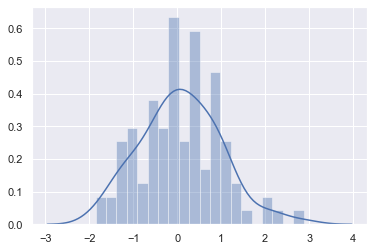

In [19]:
# 直方图
x = np.random.normal(size=100)
sns.distplot(x,kde=True,bins=20) # kde: Whether to plot a gaussian kernel density estimate. 高斯密度函数
# plt.hist(x)

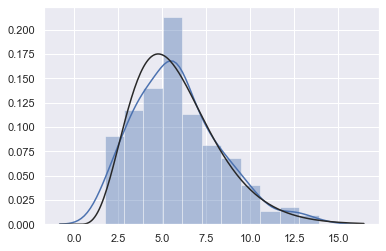

In [25]:
# 数据分布状况
x = np.random.gamma(6,size=200) # gamma分布 伽马分布
sns.distplot(x, kde=True,fit=stats.gamma)

In [28]:
# 根据均值mean和协方差cov生成数据
mean = [0,1]
cov =[(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean,cov,200)
df = pd.DataFrame(data, columns=['x','y'])
df

,x,y
0,-1.379199,-0.079437
1,-0.492676,0.140845
2,-1.112657,-0.375177
3,-0.745280,0.791016
4,-1.200084,0.355073
...,...,...
195,0.845846,2.019761
196,-1.644086,0.967012
197,1.539900,2.702881
198,-0.688120,-0.057988


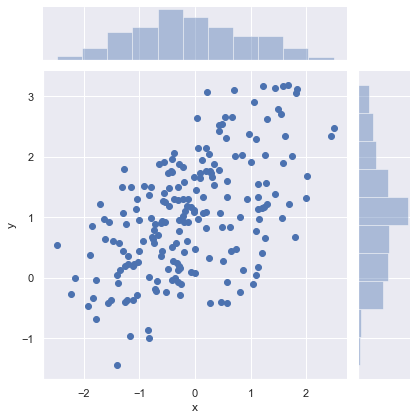

In [29]:
# x和y特征关系的分布 散点图
sns.jointplot(x='x',y='y',data=df)

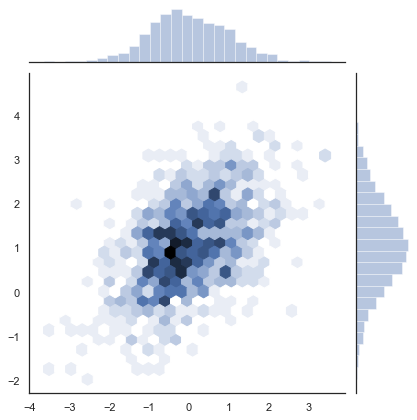

In [42]:
# hex图，更好显示关系分布，颜色差异区分
x, y =np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('white'): # 背景白色的情况下画图
    # sns.jointplot(x=x,y=y,kind='scatter',color='k')
    sns.jointplot(x=x,y=y,kind='hex',color='b')

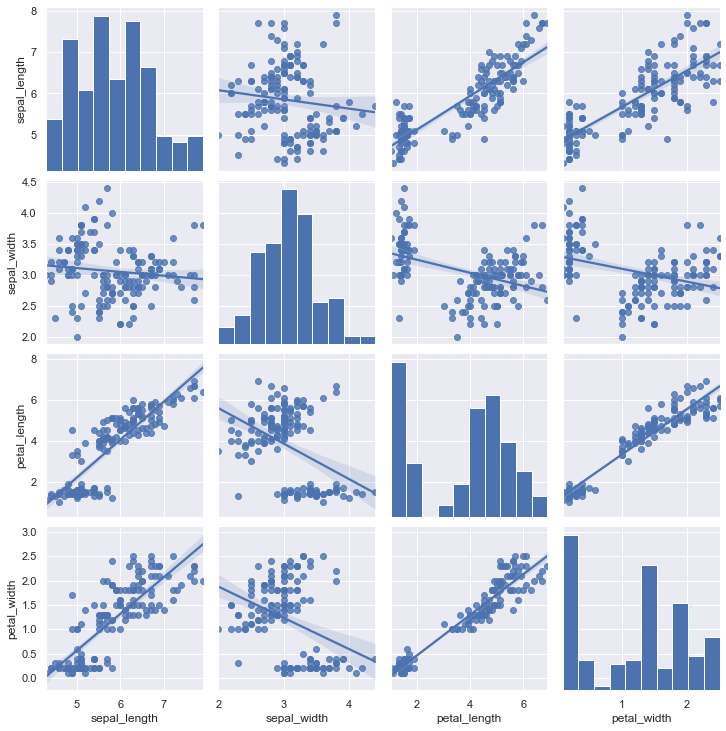

In [51]:
# 数据对之间关系 特征和特征之间的关系

import ssl
ssl._create_default_https_context = ssl._create_unverified_context # 全局取消证书验证

iris = sns.load_dataset('iris') # 在线github案例库中加载数据
# df = df.read_csv('/Users/joey/Documents/PycharmProjects/mywork/Seaborn/Iris.csv')
sns.pairplot(iris,kind='reg')

In [53]:
# 回归分析
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # 全局取消证书验证

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


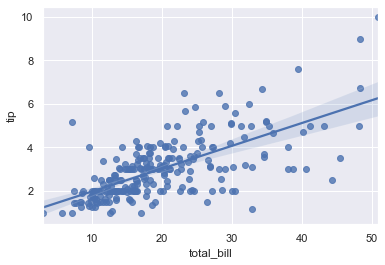

In [54]:
# regplot和lmplot 都可以画，推荐用regplot，lmplot更加高级
sns.regplot(x='total_bill',y='tip',data=tips) # 消费总额和小费的关系

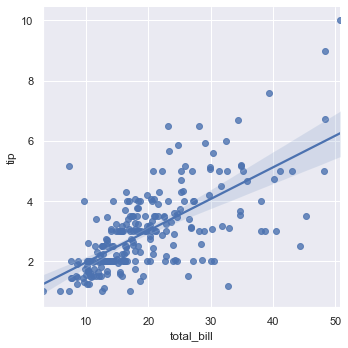

In [55]:
sns.lmplot(x='total_bill',y='tip',data=tips)

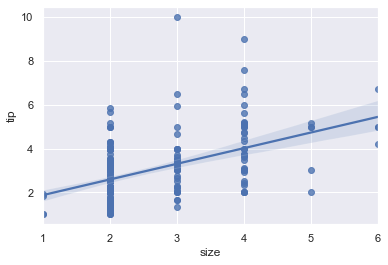

In [59]:
sns.regplot(data=tips,x='size',y='tip') # 不合适做回归分析

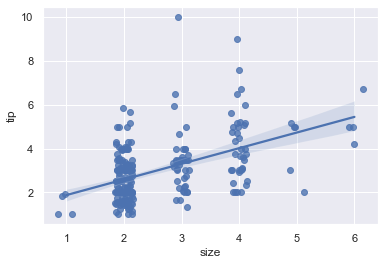

In [62]:
sns.regplot(data=tips,x='size',y='tip',x_jitter=.15) # x_jitter 小范围浮动